In [42]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

feature_rename_dict = {
    "ACSTOTPOP": 'Total population',
    "ACSTOTHH": 'Fraction limited English speaking',
    "MINORPCT": '% people of color',
    "LOWINCPCT": '% low income',
    "UNEMPPCT": '% unemployed',
    "LESSHSPCT": '% less than high school education',
    "UNEMPLOYED": 'Fraction unemployed',
    "MINORPOP": 'Fraction people of color',
    "LOWINCOME": 'Fraction low income',
    "LESSHS": 'Fraction less than HS education',
    "PM25": 'particulate matter 2.5',
    "OZONE": 'ozone',
    "DSLPM": 'diesel particulate matter',
    "CANCER": 'Air toxics cancer risk',
    "RESP": 'Air toxics respiratory HI',
    "PTRAF": 'Traffic proximity',
    "PNPL": 'Superfund proximity',
    "PRMP": 'RMP facility proximity',
    "PTSDF": 'Hazardous waste proximity',
    "UST": 'Underground storage tanks',
    "PWDIS": 'wastewater discharge',
    "AREA": 'land area in square meters',
    "AREALAND": 'Land area',
    "AREAWATER": 'Water area',
    "NPL_CNT": 'num superfund facilities in block group',
    "TSDF_CNT": 'num hazardous waste facilities in block group',
}

region_dict = {
    'AL': 'South',
    'AK': 'West',
    'AZ': 'West',
    'AR': 'South',
    'CA': 'West',
    'CO': 'West',
    'CT': 'Northeast',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'HI': 'West',
    'ID': 'West',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'IA': 'Midwest',
    'KS': 'Midwest',
    'KY': 'South',
    'LA': 'South',
    'ME': 'Northeast',
    'MD': 'South',
    'MA': 'Northeast',
    'MI': 'Midwest',
    'MN': 'Midwest',
    'MS': 'South',
    'MO': 'Midwest',
    'MT': 'West',
    'NE': 'Midwest',
    'NV': 'West',
    'NH': 'Northeast',
    'NJ': 'Northeast',
    'NM': 'West',
    'NY': 'Northeast',
    'NC': 'South',
    'ND': 'Midwest',
    'OH': 'Midwest',
    'OK': 'South',
    'OR': 'West',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'SC': 'South',
    'SD': 'Midwest',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VT': 'Northeast',
    'VA': 'South',
    'WA': 'West',
    'WV': 'South',
    'WI': 'Midwest',
    'WY': 'West',
    'AS': 'West', # American Samoa
    'DC': 'South', # District of Columbia
    'FM': 'West', # Federated States of Micronesia
    'GU': 'West', # Guam
    'MH': 'West', # Marshall Islands
    'MP': 'West', # Northern Mariana Islands
    'PW': 'West', # Palau
    'PR': 'South', # Puerto Rico
    'VI': 'South' # Virgin Islands
}

def easy_subplots(nplots, ncol=None, height_scale=1,width_scale=1,use_subplots=False,width_ratios=None,height_ratios=None,**kwargs):
    '''sets up plt.subplots with the correct number of rows and columns and figsize,
    given number of plots (nplots) and the number of columns (ncol).
    Option to make figures taller or shorter by changing the height_scale.
    Can also give additional arguments to either plt.figure or plt.subplots.
    use_subplots: True to use plt.subplots to create axes, False to use
      plt.figure, which then allows dpi to be specified.'''
    if type(nplots) != int:
        nplots = len(nplots)
    if nplots <= 4 and ncol is None:
        ncol = nplots
    if nplots%3==0 and ncol is None:
        ncol=3
    if ncol is None: ncol=4
    nrows = int(np.ceil(nplots/ncol))

    if width_ratios!=None or height_ratios!=None: use_subplots=True
    if width_ratios==None: width_ratios=np.repeat(1,ncol)
    if height_ratios==None: height_ratios=np.repeat(1,nrows)

    figsize = (7*ncol*width_scale,height_scale*6*int(np.ceil(nplots/ncol)))
    regular_version = False
    if use_subplots:
        if 'figsize' in kwargs.keys():
            fig, ax = plt.subplots(nrows,ncol,**kwargs,
                            gridspec_kw={'width_ratios':width_ratios,'height_ratios':height_ratios})
        else:
            fig, ax = plt.subplots(nrows,ncol,figsize=figsize,
                            gridspec_kw={'width_ratios':width_ratios,'height_ratios':height_ratios},**kwargs)
        if 'dpi' in kwargs.keys(): fig.set_dpi(kwargs['dpi'])
    else:
        if 'figsize' in kwargs.keys():
            fig = plt.figure(**kwargs)
        else:
            fig = plt.figure(**kwargs, figsize = figsize)
        ax = []
        for i in np.arange(1,int(np.ceil(nrows*ncol))+1):
            ax += [fig.add_subplot(nrows, ncol, i)]
    return fig,np.array(ax).flatten()

def init_plot2(fontsize=20,figsize=(8,5.5),font='Arial',font_family='sans-serif',linewidth=4,font_style='bold',have_axes=True,dpi=50,marker='None',markersize=12,markeredgewidth=1.0,markeredgecolor=None,markerfacecolor=None, markercycler=False, cmap='Dark2', n_colors=8, **kwargs):
    '''Sets default plot formats.
    Potential inputs: fontsize, figsize, font,
    font_family, font_style, linewidth, have_axes,
    dpi, marker, markersize, markeredgewidth,
    markeredgecolor, markerfacecolor.
    have_axes: determines whether there is a border
    on the plot. Also has **kwargs so that any other
    arguments that can be passed to mpl.rcParams.update
    that were not listed above.

    cmap can take any matplotlib colormap string.'''
    import matplotlib as mpl
    params = {
        'axes.labelsize': fontsize,
        'font.size': fontsize,
        'axes.titlesize':fontsize+1,
        'axes.titleweight':font_style,
        'figure.titlesize':fontsize+1,
        'legend.fontsize': fontsize,
        'xtick.labelsize': fontsize,
        'ytick.labelsize': fontsize,
        'axes.titlesize': fontsize+2,
        'figure.titlesize': fontsize+2,
        'text.usetex': False,
        'figure.figsize': figsize,
        'lines.linewidth': linewidth,
        'lines.solid_capstyle': 'round',
        'legend.framealpha': 1,
        'legend.frameon': False,
        'mathtext.default': 'regular',
        'axes.linewidth': 2/3*linewidth,
        'xtick.direction': 'in', # in, out, inout
        'ytick.direction': 'in', # in, out, inout
        'xtick.major.size': 7,
        'xtick.major.width': 2,
        'xtick.major.pad': 3.5,
        'ytick.major.size': 7,
        'ytick.major.width': 2,
        'ytick.major.pad': 3.5,
        'font.family': font_family,
        'font.'+font_family: font,
        'figure.dpi': dpi,
        'lines.marker': marker,
        'lines.markersize':markersize,
        'lines.markeredgewidth':markeredgewidth,
        'pdf.fonttype': 42,
        'ps.fonttype': 42,
        'svg.fonttype': 'none',
        'savefig.transparent': True,
        'savefig.bbox': 'tight',
        'axes.facecolor': 'white',
        'axes.edgecolor':'k',
        }

    mpl.rcParams.update(params)
    mpl.rcParams.update(**kwargs)
    mpl.rcParams['axes.spines.left'] = have_axes
    mpl.rcParams['axes.spines.right'] = have_axes
    mpl.rcParams['axes.spines.top'] = have_axes
    mpl.rcParams['axes.spines.bottom'] = have_axes
    mpl.rcParams['axes.axisbelow'] = True
    mpl.rcParams['axes.grid'] = True
    mpl.rcParams['axes.grid.axis'] = 'y'
    mpl.rcParams['grid.color'] = '0.9'
    mpl.rcParams['grid.linewidth'] = 1
    mpl.rcParams['grid.linestyle'] = '-'
    mpl.rcParams['axes.labelweight'] = font_style
    mpl.rcParams['font.weight'] = font_style

    sns.set_palette(cmap)

    if markeredgecolor != None:
        mpl.rcParams['lines.markeredgecolor'] = markeredgecolor
    if markerfacecolor != None:
        mpl.rcParams['lines.markerfacecolor'] = markerfacecolor
    if markercycler:
        cmap_colors = mpl.cm.get_cmap(cmap)
        colors = [cmap_colors(i) for i in np.linspace(0,1,n_colors)]
        markers = ["o","s","^","v","p","8","P","X"]
        if n_colors>8: markers = np.tile(markers,int(np.floor(n_colors/8)+1))
        markers = markers[:n_colors]
        mpl.rcParams['axes.prop_cycle'] =  cycler('color',colors) + cycler('marker',markers)

init_plot2(dpi=150)

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [214]:


# Prepare the data for training
features = data.loc[:, 'Total population':].columns
X = data.loc[:, features].values # Features
y = data.loc[:, 'Any Landfill'].values # Target variable (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, ind_train, ind_test = train_test_split(
    X, y, data.index, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Train accuracy:', accuracy_score(y_train, rf_clf.predict(X_train)))
print('Test accuracy:', accuracy)

Train accuracy: 1.0
Test accuracy: 0.6835573940020683


In [164]:
len(features)
from itertools import combinations
apc = []
for i in range(4,len(features)+1):
    for j in combinations(features,i):
        apc += [j]
        
apc_acc = pd.DataFrame()
for e,a in enumerate(apc):
    a_i = [list(features).index(i) for i in a]
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    X_train_sub = X_train[:,a_i]
    rf_clf.fit(X_train_sub, y_train)
    # Make predictions on the test set
    y_pred = rf_clf.predict(X_test[:,a_i])
    # Evaluate the accuracy of the model
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train_sub))
    apc_acc.loc[e,'Test accuracy'] = test_accuracy
    apc_acc.loc[e,'Train accuracy'] = train_accuracy
    if e%100==0:
        print(e,'/',len(apc), '{:.1f}%'.format(100*e/len(apc)))

0 / 7814 0.0%
100 / 7814 0.0%
200 / 7814 0.0%
300 / 7814 0.0%
400 / 7814 0.1%
500 / 7814 0.1%
600 / 7814 0.1%
700 / 7814 0.1%
800 / 7814 0.1%
900 / 7814 0.1%
1000 / 7814 0.1%
1100 / 7814 0.1%
1200 / 7814 0.2%
1300 / 7814 0.2%
1400 / 7814 0.2%
1500 / 7814 0.2%


KeyboardInterrupt: 

# Main run

In [24]:
from sklearn.feature_selection import RFECV, RFE
# Loading the dataset
data = pd.read_csv("data/concatenated_data_v3.csv") ##TODO 
norm_cols = ['ACSTOTHH', 'MINORPOP', 'LOWINCOME', 'UNEMPLOYED', 'LESSHS']
data.loc[:,norm_cols] = data.loc[:,norm_cols].div(data.loc[:,'ACSTOTPOP'],axis=0)
log_cols = ['ACSTOTPOP','AREALAND','AREAWATER','PTRAF']
data.loc[:,log_cols] = np.log10(data.loc[:,log_cols].replace(0,np.nan))
data = data.dropna()
columns_to_drop = ['PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'PNPL', 'NPL_CNT', 'TSDF_CNT',
                   'PTSDF', 'UST', 'PRMP', 'PWDIS', 'ACSTOTPOP']
data.drop(columns_to_drop,axis=1, inplace=True)
data = data.rename(columns = feature_rename_dict)
data['Region'] = data['State'].map(region_dict)

# Prepare the data for training
features = data.drop(['Region','State','County','Operational', 'Potential', 'Any Landfill'],axis=1).columns
X = data.loc[:, features].values # Features
y = data.loc[:, 'Any Landfill'].values # Target variable (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, ind_train, ind_test = train_test_split(
    X, y, data.index, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

acc = pd.DataFrame()
features_dict = {}
features_dict_n = {}
for n in range(4,len(features)):
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    selector = RFE(rf_clf, step=1, n_features_to_select=n)
    selector = selector.fit(X, y)
    chosen_features = features[selector.support_]
    chosen_features_n = np.arange(0,len(features))[selector.support_]

    print(n, chosen_features)
    X_train_sub = X_train[:,chosen_features_n]
    rf_clf.fit(X_train_sub, y_train)
    # Make predictions on the test set
    y_pred = rf_clf.predict(X_test[:,chosen_features_n])
    # Evaluate the accuracy of the model
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train_sub))
    acc.loc[n,'Test accuracy'] = test_accuracy
    acc.loc[n,'Train accuracy'] = train_accuracy
    features_dict[n] = chosen_features
    features_dict_n[n] = chosen_features_n

features_to_use = features_dict[acc['Test accuracy'][::-1].idxmax()]
features_to_use_n = features_dict_n[acc['Test accuracy'][::-1].idxmax()]
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_sub = X_train[:,features_to_use_n]
rf_clf.fit(X_train_sub, y_train)
# Make predictions on the test set
y_pred = rf_clf.predict(X_test[:,features_to_use_n])
# Evaluate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train_sub))
print('Train accuracy:',train_accuracy)
print('Test accuracy:',test_accuracy)

4 Index(['Fraction low income', 'Fraction unemployed', 'Traffic proximity',
       'Land area'],
      dtype='object')
5 Index(['Fraction low income', 'Fraction unemployed', 'Traffic proximity',
       'Land area', 'Water area'],
      dtype='object')
6 Index(['Fraction people of color', 'Fraction low income',
       'Fraction unemployed', 'Traffic proximity', 'Land area', 'Water area'],
      dtype='object')
7 Index(['Fraction people of color', 'Fraction low income',
       'Fraction unemployed', 'Fraction less than HS education',
       'Traffic proximity', 'Land area', 'Water area'],
      dtype='object')
8 Index(['Fraction limited English speaking', 'Fraction people of color',
       'Fraction low income', 'Fraction unemployed',
       'Fraction less than HS education', 'Traffic proximity', 'Land area',
       'Water area'],
      dtype='object')
Train accuracy: 1.0
Test accuracy: 0.7046688382193268


## Old version of feature selection

In [218]:
# Loading the dataset
data = pd.read_csv("data/concatenated_data_v3.csv") ##TODO 
norm_cols = ['ACSTOTHH', 'MINORPOP', 'LOWINCOME', 'UNEMPLOYED', 'LESSHS']
data.loc[:,norm_cols] = data.loc[:,norm_cols].div(data.loc[:,'ACSTOTPOP'],axis=0)
data = data.dropna()
columns_to_drop = ['PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'PNPL', 'NPL_CNT', 'TSDF_CNT', 'PTSDF', 'UST']
data.drop(columns_to_drop,axis=1, inplace=True)
data = data.rename(columns = feature_rename_dict)

# Prepare the data for training
features = data.loc[:, 'Total population':].columns
X = data.loc[:, features].values # Features
y = data.loc[:, 'Any Landfill'].values # Target variable (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, ind_train, ind_test = train_test_split(
    X, y, data.index, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Getting the features to include
acc_big = pd.DataFrame()

base_features = []
base_features_n = []
for k in range(X_train.shape[1]):
    acc = pd.DataFrame()
    for i,n in zip(range(X_train.shape[1]),features):
        if n not in base_features:
            rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
            X_train_sub = X_train[:,base_features_n+[i]]
            rf_clf.fit(X_train_sub, y_train)
            # Make predictions on the test set
            y_pred = rf_clf.predict(X_test[:,base_features_n+[i]])
            # Evaluate the accuracy of the model
            test_accuracy = accuracy_score(y_test, y_pred)
            train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train_sub))
            acc.loc[n,'Test accuracy'] = test_accuracy
            acc.loc[n,'Train accuracy'] = train_accuracy
    best_str = acc['Test accuracy'].idxmax()
    if best_str not in base_features:
        base_features += [best_str]
        base_features_n += [list(features).index(best_str)]
        acc_big.loc[k, 'Test accuracy'] = acc['Test accuracy'].max()
        acc_big.loc[k, 'Train accuracy'] = acc['Train accuracy'].max()
        
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
features_to_use = base_features[:acc_big['Test accuracy'].idxmax()+1]
features_to_use_n = [list(features).index(i) for i in features_to_use]
X_train_sub = X_train[:,features_to_use_n]
rf_clf.fit(X_train_sub, y_train)
# Make predictions on the test set
y_pred = rf_clf.predict(X_test[:,features_to_use_n])
# Evaluate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train_sub))
print('Train accuracy:',train_accuracy)
print('Test accuracy:',test_accuracy)

Train accuracy: 1.0
Test accuracy: 0.7311271975180972


In [276]:
features_to_use

Index(['Total population', 'Fraction people of color', 'Fraction low income',
       'Traffic proximity', 'RMP facility proximity', 'wastewater discharge',
       'Land area', 'Water area'],
      dtype='object')

In [269]:
features_to_use_n, features_to_use

(array([ 0,  1,  2,  5,  6,  8,  9, 11, 12]),
 Index(['Total population', 'Fraction limited English speaking',
        'Fraction people of color', 'Fraction less than HS education',
        'Traffic proximity', 'Hazardous waste proximity',
        'Underground storage tanks', 'Land area', 'Water area'],
       dtype='object'))

In [270]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_sub = X_train[:,[0]]
rf_clf.fit(X_train_sub, y_train)
# Make predictions on the test set
y_pred = rf_clf.predict(X_test[:,[0]])
# Evaluate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train_sub))
print('Train accuracy:',train_accuracy)
print('Test accuracy:',test_accuracy)

Train accuracy: 0.9942324755989352
Test accuracy: 0.6184074457083765


# Plots and interpretation

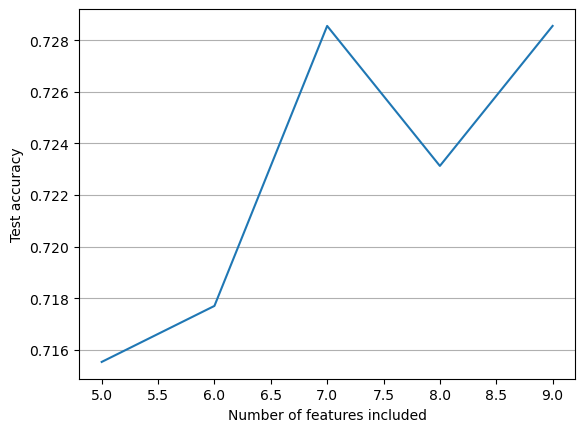

In [368]:
acc['Test accuracy'].rename(dict(zip(acc_big.index, [i+1 for i in acc_big.index]))).plot(
    xlabel='Number of features included', ylabel='Test accuracy').grid(axis='y')


In [25]:
import shap
explainer = shap.TreeExplainer(rf_clf)
shap_values_object = explainer(X_test[:,features_to_use_n])
shap_values = shap_values_object.values[:,:,1]
shap_values_df = pd.DataFrame(shap_values, ind_test, features_to_use)

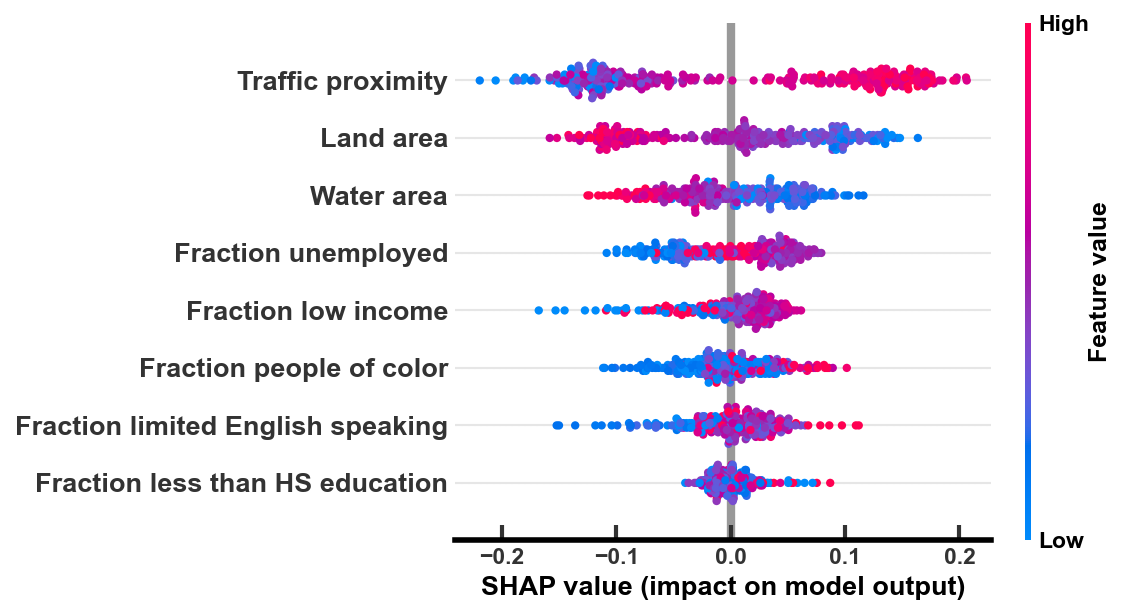

In [45]:
from matplotlib import pyplot as plt
shap.summary_plot(shap_values_object[:,:,1], feature_names=features_to_use, plot_size=(8,4.5))


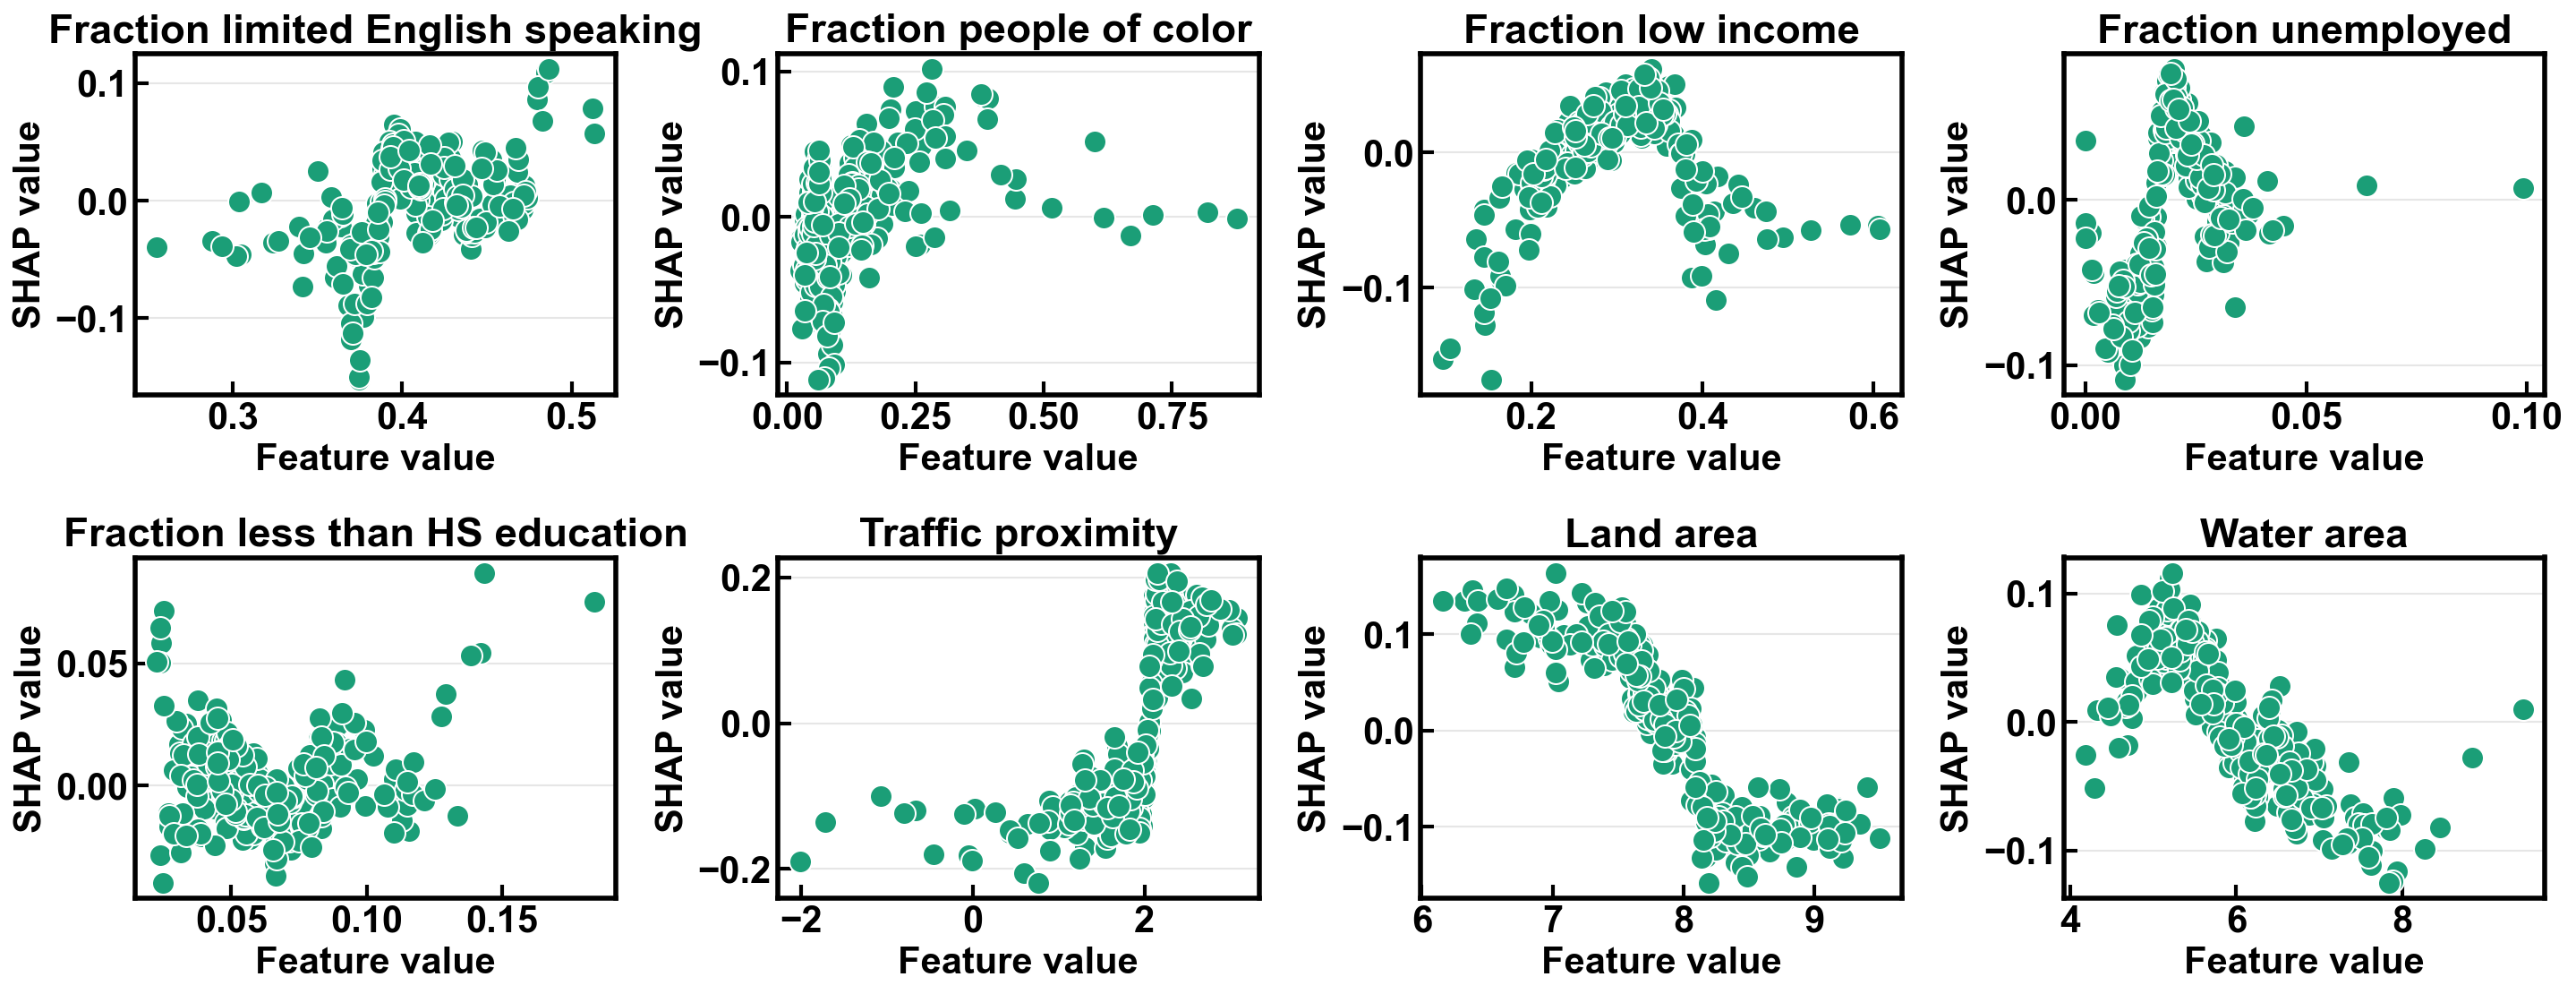

In [46]:
fig,ax = easy_subplots(features_to_use, width_scale=0.7, height_scale=0.65)
use_regions=False
for col,a in zip(features_to_use, ax):
    if use_regions:
        kws = {'palette':'viridis', 'alpha':0.5, 'hue':data.loc[shap_values_df.index]['Region']}
    else:
        kws = {}
    scat = sns.scatterplot(x = data.loc[shap_values_df.index][col], y=shap_values_df[col], ax=a, **kws,
                          )
    ylab = col#.replace(' HS','\nHS')
    a.set_ylabel(f'SHAP value')
    a.set_xlabel(f'Feature value')
    a.set_title(col)
    if use_regions:
        a.legend(fontsize=18, title='Region')
        if a!=ax[0]:
            a.get_legend().remove()
fig.tight_layout()
# fig.set_dpi(100)
plt.show()
plt.close()

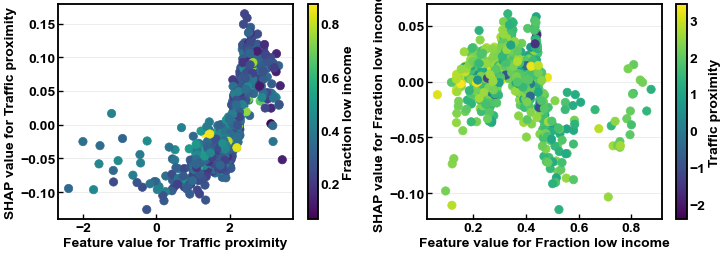

In [462]:
col2 = 'Fraction low income'
col = 'Traffic proximity'

fig,axes = plt.subplots(1,2, figsize=(15,5.5))
ax=axes[0]
scat = ax.scatter(data.loc[shap_values_df.index][col], shap_values_df[col],
            c=data.loc[shap_values_df.index][col2])
plt.colorbar(scat, label=col2, ax=ax)
ax.set_ylabel(f'SHAP value for {col}')
ax.set_xlabel(f'Feature value for {col}')

ax=axes[1]
scat = ax.scatter(data.loc[shap_values_df.index][col2], shap_values_df[col2],
            c=data.loc[shap_values_df.index][col])
plt.colorbar(scat, label=col, ax=ax)
ax.set_ylabel(f'SHAP value for {col2}')
ax.set_xlabel(f'Feature value for {col2}')

fig.tight_layout()

# Re-running with different regions

In [34]:
reg_data = {}
regions = data.Region.unique()
for reg in regions:
    X_r = X[(data['Region']==reg).values,:]
    y_r = y[(data['Region']==reg).values]
    data_r = data.loc[data['Region']==reg]
    
    X_train_r, X_test_r, y_train_r, y_test_r, ind_train_r, ind_test_r = train_test_split(
        X_r, y_r, data_r.index, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_r = scaler.fit_transform(X_train_r)
    X_test_r = scaler.transform(X_test_r)
    
    
    
    region = {}
    rf_clf_r = RandomForestClassifier(n_estimators=100, random_state=42)
    X_train_sub = X_train_r[:,features_to_use_n]
    rf_clf_r.fit(X_train_sub, y_train_r)
    # Make predictions on the test set
    y_pred = rf_clf_r.predict(X_test_r[:,features_to_use_n])
    # Evaluate the accuracy of the model
    test_accuracy = accuracy_score(y_test_r, y_pred)
    train_accuracy = accuracy_score(y_train_r, rf_clf_r.predict(X_train_sub))
    region['Test accuracy'] = test_accuracy
    region['Train accuracy'] = train_accuracy
    region['Model'] = rf_clf_r
    
    explainer = shap.TreeExplainer(rf_clf_r)
    shap_values_object = explainer(X_test_r[:,features_to_use_n])
    shap_values = shap_values_object.values[:,:,1]
    shap_values_df = pd.DataFrame(shap_values, ind_test_r, features_to_use)
    region['shap_values_object'] = shap_values_object
    region['shap_values_df'] = shap_values_df
    reg_data[reg] = region

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


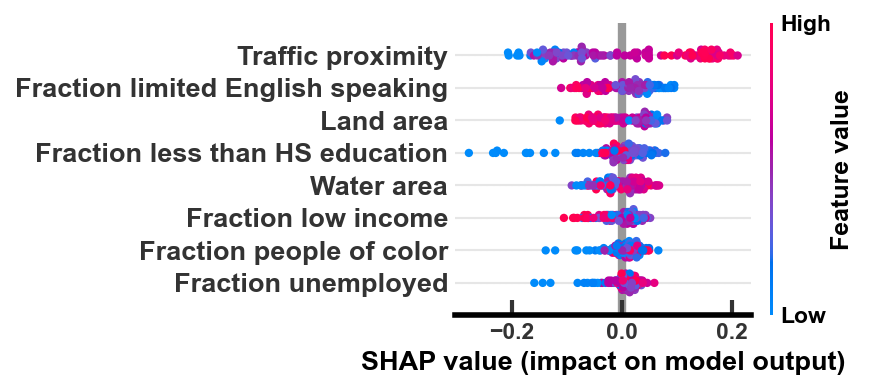

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


West N= 421 0.717


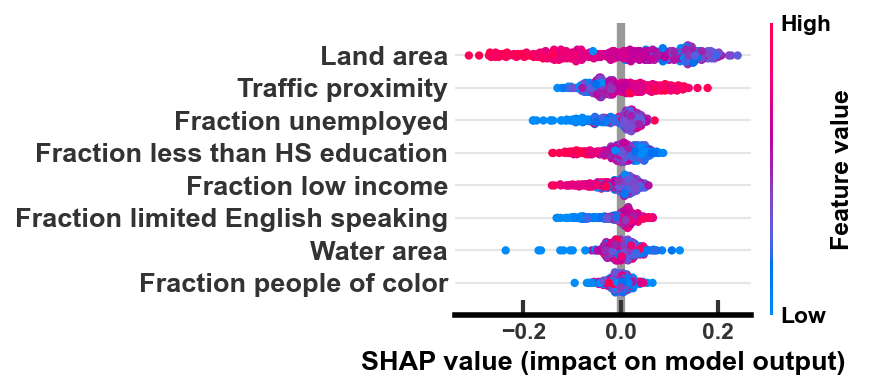

South N= 1433 0.693


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


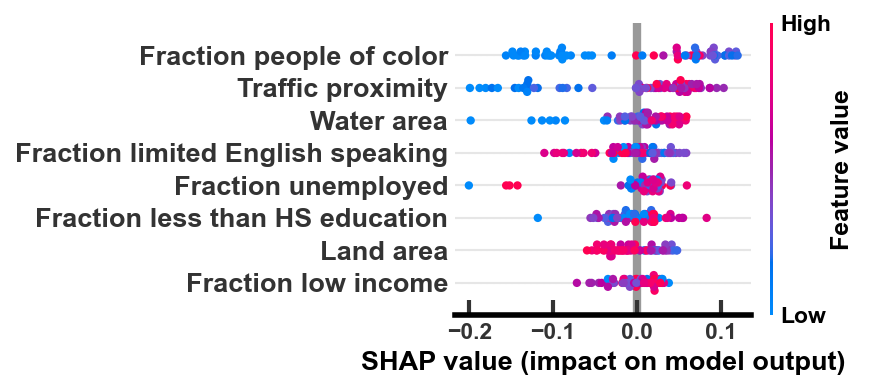

Northeast N= 213 0.594


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


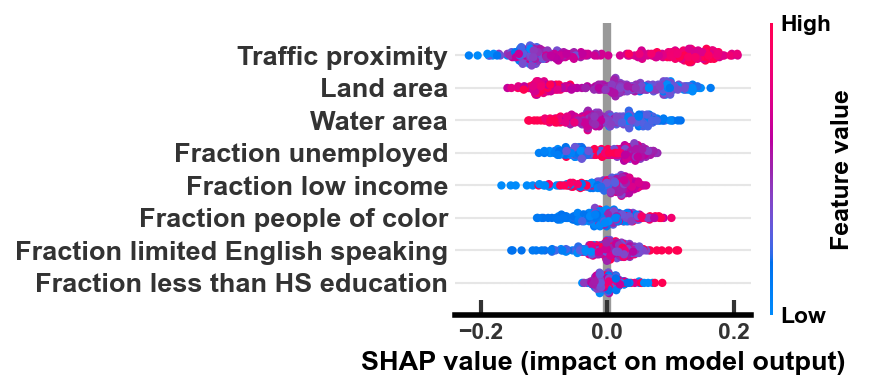

Midwest N= 1000 0.670


In [49]:
for reg in regions:
    shap_values_object = reg_data[reg]['shap_values_object']
    shap.summary_plot(shap_values_object[:,:,1], feature_names=features_to_use, title=reg, plot_size=(6,3))
    print(reg, 'N=',data.Region.value_counts()[reg], '{:.3f}'.format(reg_data[reg]['Test accuracy']))
    plt.show()


Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.


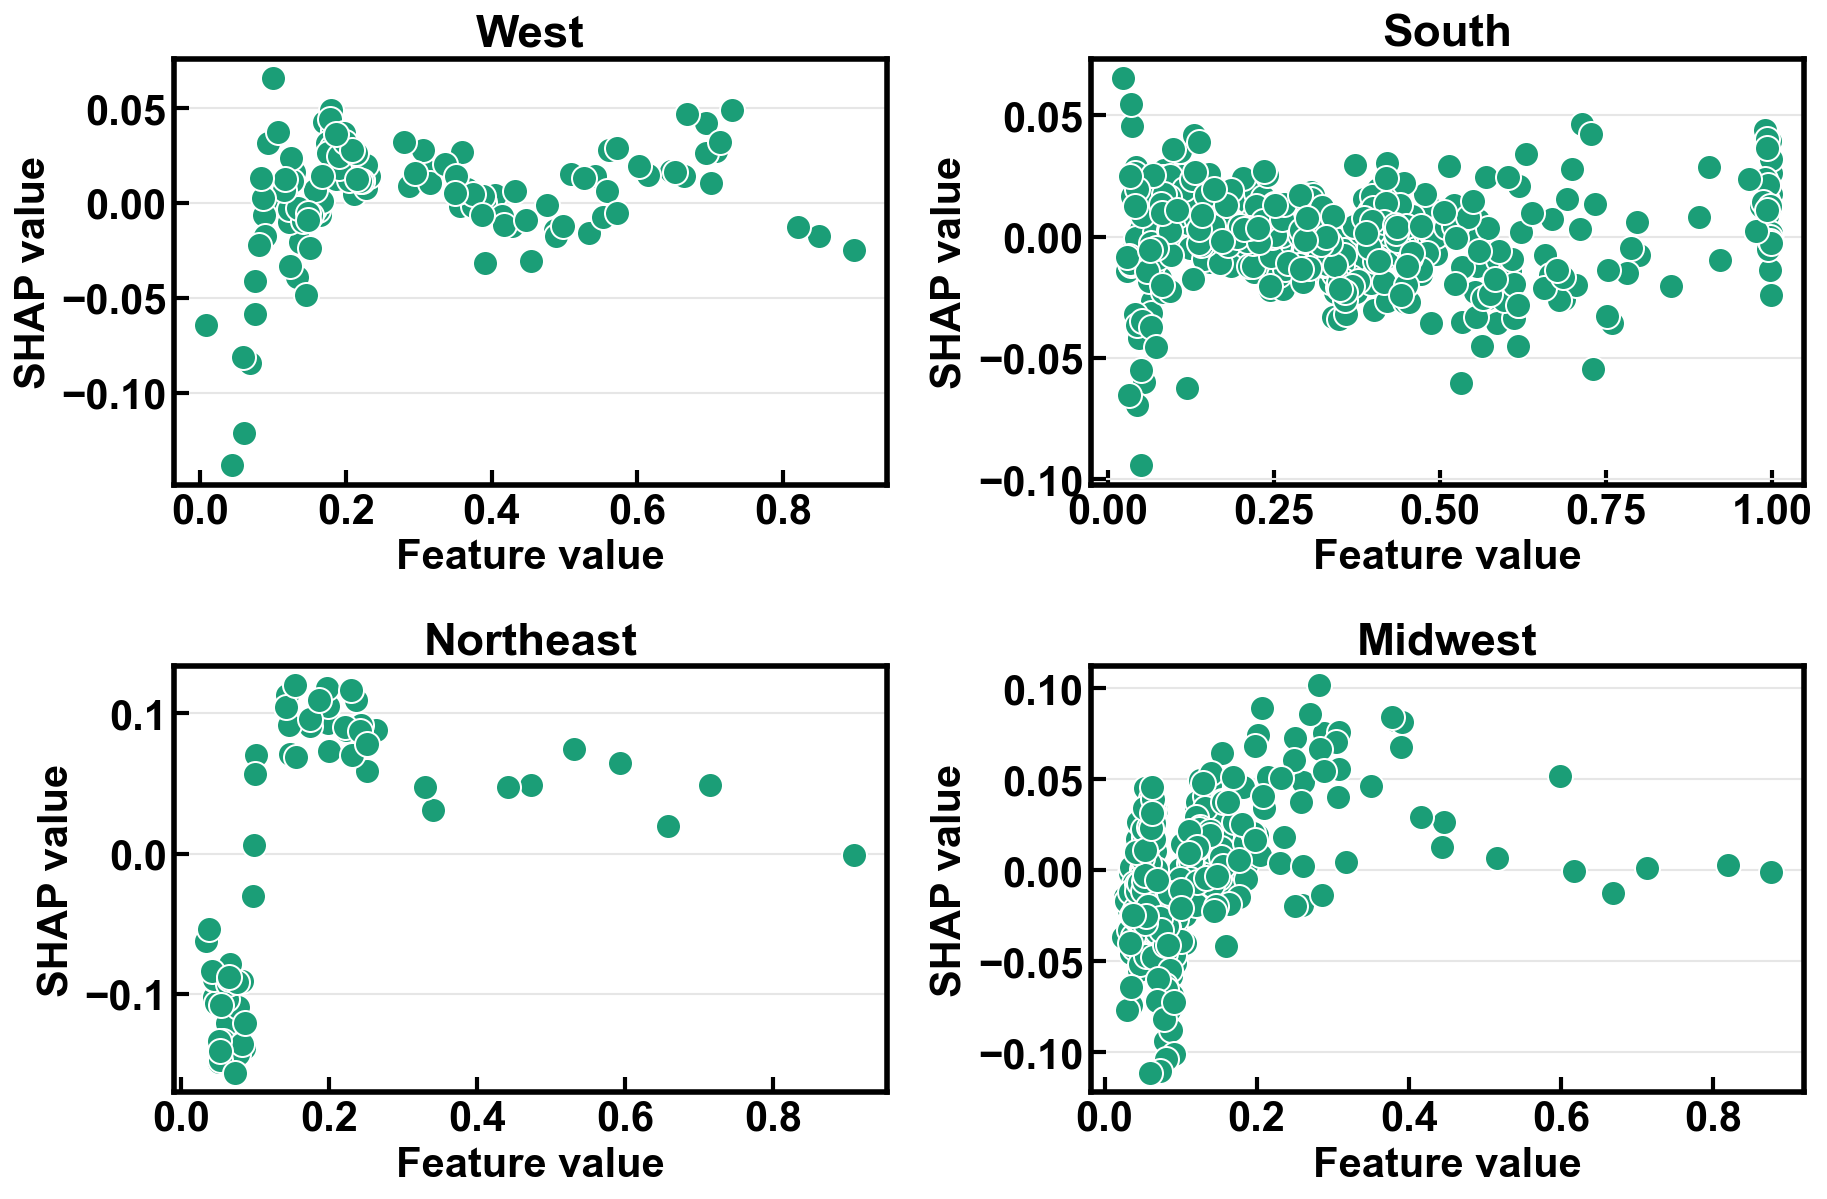

In [58]:
fig,ax = easy_subplots(regions,2, height_scale=0.7, width_scale=0.9)
col = 'Fraction people of color'
for reg,a in zip(regions, ax):
    shap_values_df_r = reg_data[reg]['shap_values_df']
    scat = sns.scatterplot(x = data.loc[shap_values_df_r.index][col], y=shap_values_df_r[col],
#                 hue=data.loc[shap_values_df_r.index]['Fraction low income'], 
                           ax=a, palette='viridis')
#     plt.colorbar(scat, label=col2, ax=a)
    ylab = col.replace(' HS','\nHS')
    a.set_ylabel(f'SHAP value')
    a.set_xlabel(f'Feature value')
    a.set_title(reg)
#     a.legend(loc=(1.1,0))
#     if a!=ax[1]:
#         a.get_legend().remove()
        
fig.tight_layout()

# Operational vs Potential

In [59]:
op_data = {}
for target in ['Operational','Potential']:
    X_o = X.copy()
    y_o = data[target].values
    data_o = data.copy()
    
    X_train_o, X_test_o, y_train_o, y_test_o, ind_train_o, ind_test_o = train_test_split(
        X_o, y_o, data_o.index, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_o = scaler.fit_transform(X_train_o)
    X_test_o = scaler.transform(X_test_o)
    
    
    
    operate = {}
    rf_clf_o = RandomForestClassifier(n_estimators=100, random_state=42)
    X_train_sub = X_train_o[:,features_to_use_n]
    rf_clf_o.fit(X_train_sub, y_train_o)
    # Make predictions on the test set
    y_pred = rf_clf_o.predict(X_test_o[:,features_to_use_n])
    # Evaluate the accuracy of the model
    test_accuracy = accuracy_score(y_test_o, y_pred)
    train_accuracy = accuracy_score(y_train_o, rf_clf_o.predict(X_train_sub))
    operate['Test accuracy'] = test_accuracy
    operate['Train accuracy'] = train_accuracy
    operate['Model'] = rf_clf_o
    
    explainer = shap.TreeExplainer(rf_clf_o)
    shap_values_object = explainer(X_test_o[:,features_to_use_n])
    shap_values = shap_values_object.values[:,:,1]
    shap_values_df = pd.DataFrame(shap_values, ind_test_o, features_to_use)
    operate['shap_values_object'] = shap_values_object
    operate['shap_values_df'] = shap_values_df
    op_data[target] = operate

In [60]:
[op_data[i]['Test accuracy'] for i in ['Operational','Potential']]

[0.8610206297502715, 0.6492942453854506]

Using only county population as a feature:
- Operational test accuracy: 0.827
- Potential landfill site test accuracy: 0.568

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


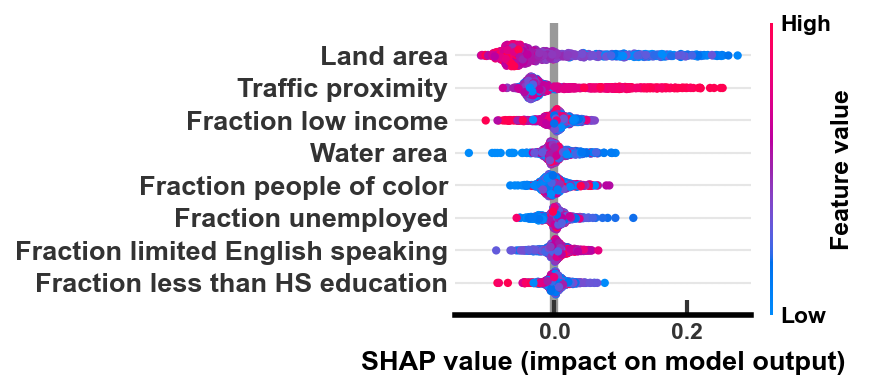

Operational accuracy: 0.861


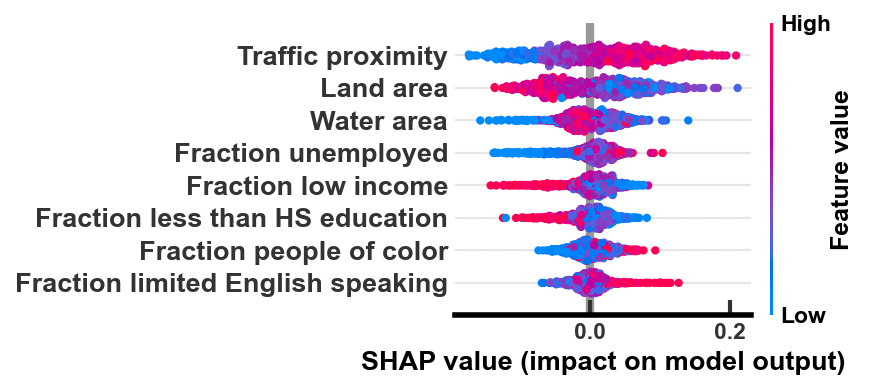

Potential accuracy: 0.649


In [61]:
for target in ['Operational','Potential']:
    shap_values_object = op_data[target]['shap_values_object']
    shap.summary_plot(shap_values_object[:,:,1], feature_names=features_to_use, title=reg, plot_size=(6,3))
    print(target,'accuracy: {:.3f}'.format(op_data[target]['Test accuracy']))
    plt.show()

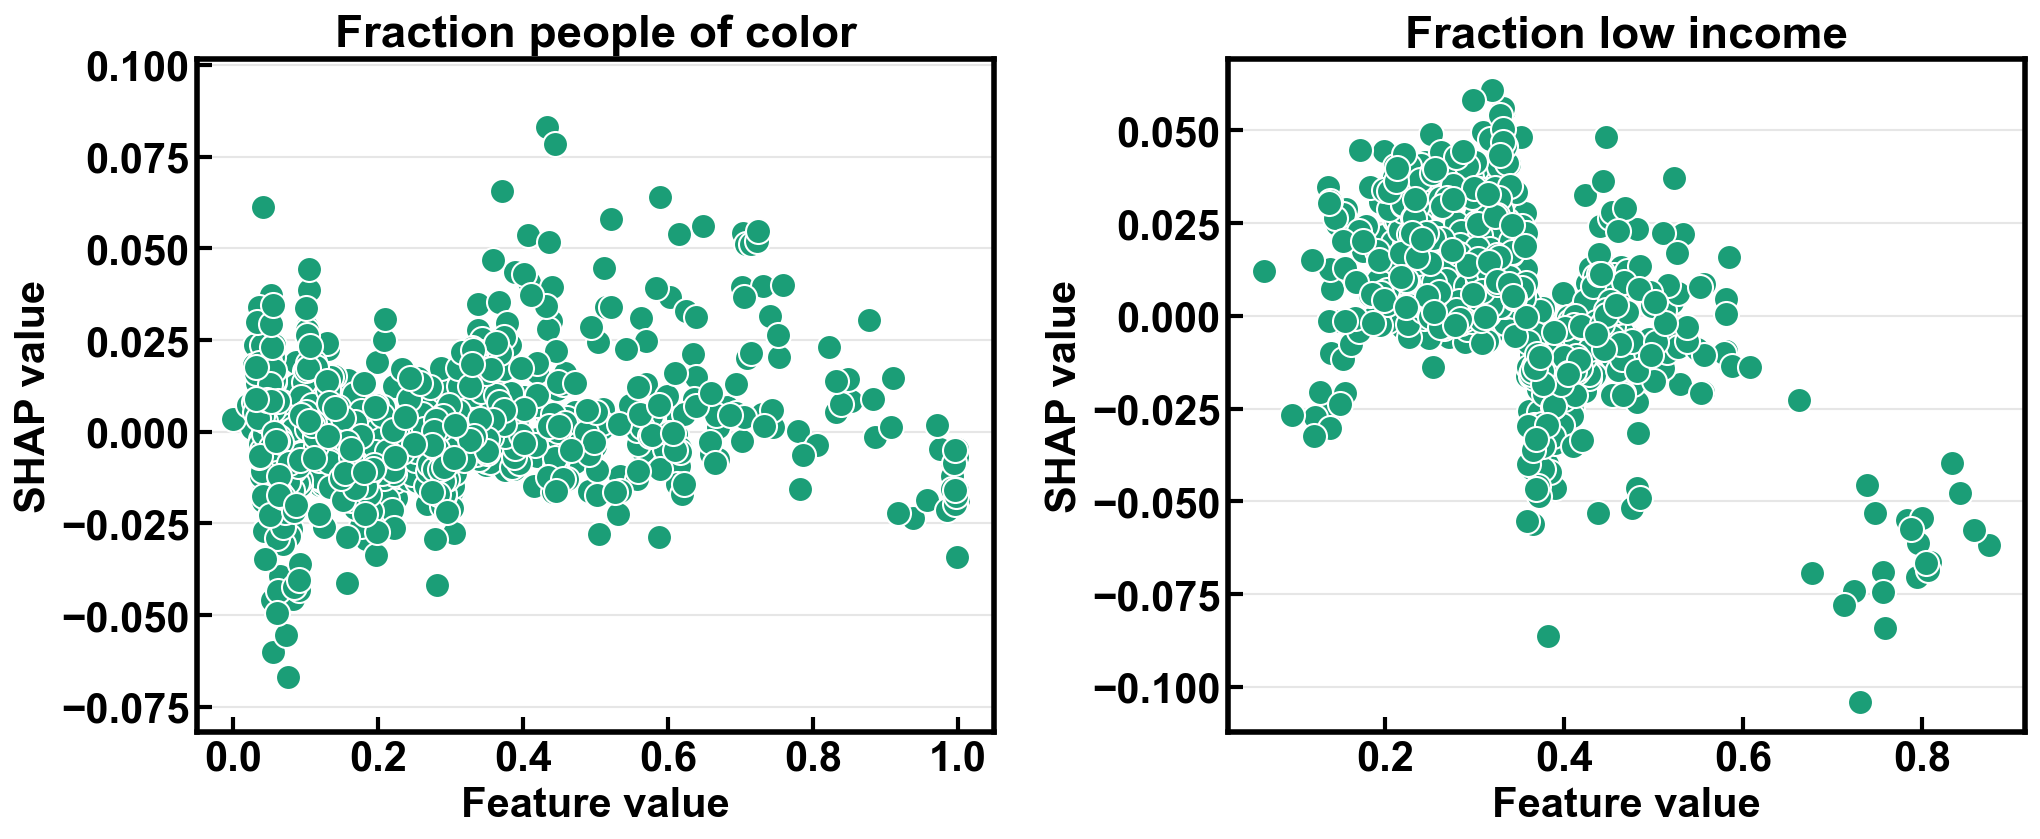

In [83]:
shap_values_df = op_data['Operational']['shap_values_df']
col2 = 'Fraction low income'
col = 'Fraction people of color'

fig,axes = plt.subplots(1,2, figsize=(14,6))
ax=axes[0]
scat = ax.scatter(data.loc[shap_values_df.index][col], shap_values_df[col], linewidths=1, edgecolors='w',
#             c=data.loc[shap_values_df.index][col2]
                 )
# plt.colorbar(scat, label=col2, ax=ax)
ax.set_ylabel(f'SHAP value')
ax.set_xlabel(f'Feature value')
ax.set_title(f'{col}')
ax.set_ylim((-0.08194497386508565, 0.10161060022860292))

ax=axes[1]
scat = ax.scatter(data.loc[shap_values_df.index][col2], shap_values_df[col2], linewidths=1, edgecolors='w',
#             c=data.loc[shap_values_df.index][col]
                 )
# plt.colorbar(scat, label=col, ax=ax)
ax.set_ylabel(f'SHAP value')
ax.set_xlabel(f'Feature value')
ax.set_title(f'{col2}')

fig.tight_layout()

# z1_plot = ax1.scatter(x,y,c = z1,vmin=0.0,vmax=0.4)
# plt.colorbar(z1_plot,cax=ax1)

In [81]:
axes[0].get_ylim()

(-0.08194497386508565, 0.10161060022860292)